In [102]:
# Loading packages
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 




df = pd.read_csv('data_2.csv')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null object
LoanAmount           594 non-null object
Loan_Amount_Term     602 non-null object
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 62.4+ KB


In [104]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     12
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## target

In [105]:
#Y :1 ,N:1 로 바꾸자
df['Loan_Status'] = df['Loan_Status'].map({'Y':1,'N':0})
df['Loan_Status'].sum()/len(df['Loan_Status'])

0.6872964169381107

## 명목형 변수

In [118]:
cat_cols = [col for col in df.columns if df[col].dtypes in ['object']]

In [119]:
cat_cols = cat_cols[1:]

In [120]:
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Property_Area']

In [51]:
# Plot , 대출승인 vs 변수
def make_plot(df, col):
    f, ax = plt.subplots(1,2,figsize=(14,8))
    df[col].value_counts().plot.bar(ax=ax[0])
    ax[0].set_ylabel('Count')
    ax[0].set_title(col+ ': Count')
    sns.countplot(col,hue='Loan_Status',data=df, ax= ax[1])
    ax[1].set_title(col+': Loan_Status VS Count')
    plt.show()
    print(df[col].isnull().sum(),print(df[col].unique()))
    print(df[[col,'Loan_Status']].groupby([col]).mean())

******************************Gender******************************


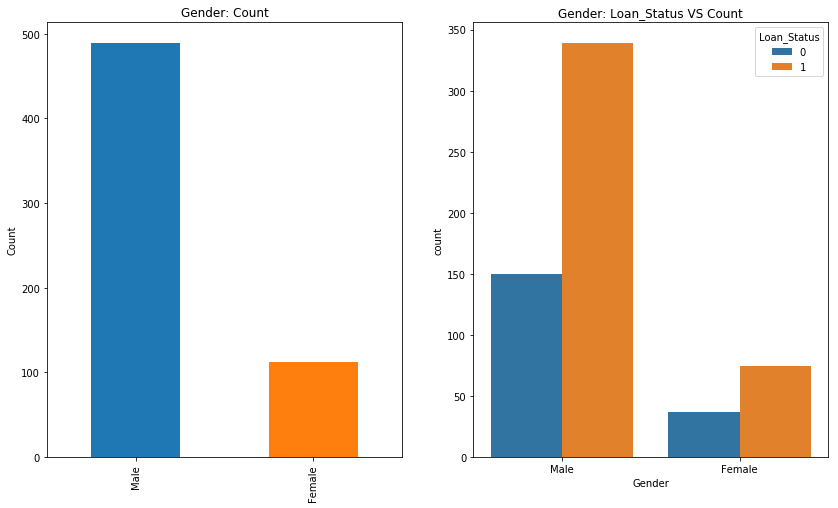

['Male' 'Female' nan]
13 None
        Loan_Status
Gender             
Female     0.669643
Male       0.693252
******************************Married******************************


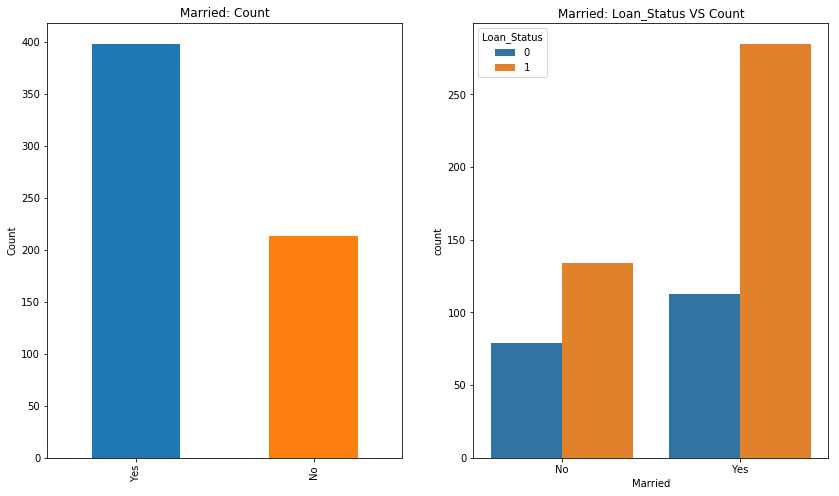

['No' 'Yes' nan]
3 None
         Loan_Status
Married             
No          0.629108
Yes         0.716080
******************************Dependents******************************


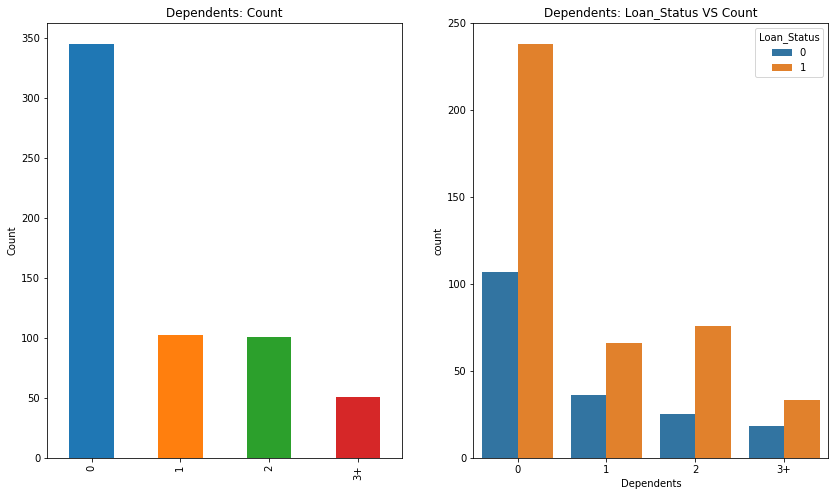

['0' '1' '2' '3+' nan]
15 None
            Loan_Status
Dependents             
0              0.689855
1              0.647059
2              0.752475
3+             0.647059
******************************Education******************************


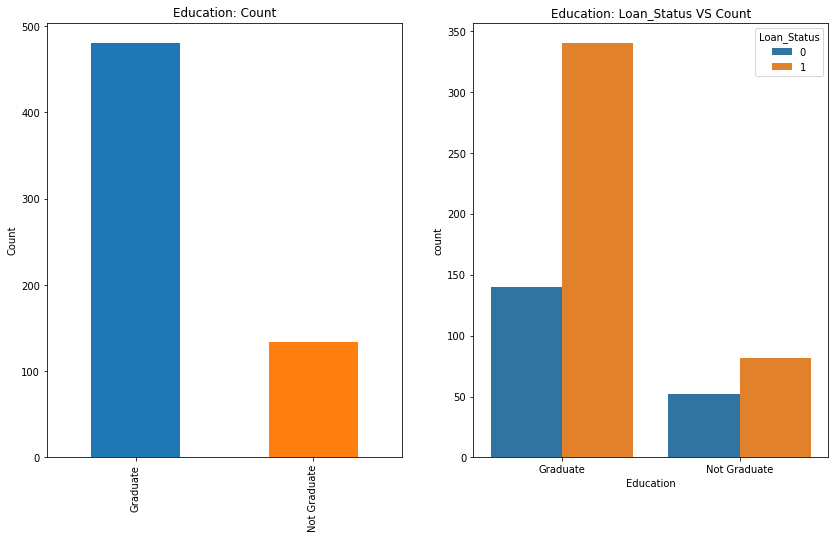

['Graduate' 'Not Graduate']
0 None
              Loan_Status
Education                
Graduate         0.708333
Not Graduate     0.611940
******************************Self_Employed******************************


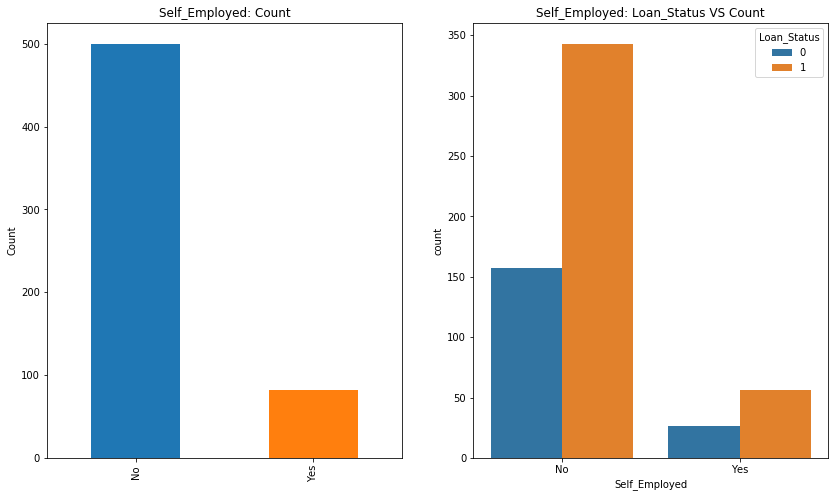

['No' 'Yes' nan]
32 None
               Loan_Status
Self_Employed             
No                0.686000
Yes               0.682927
******************************CoapplicantIncome******************************


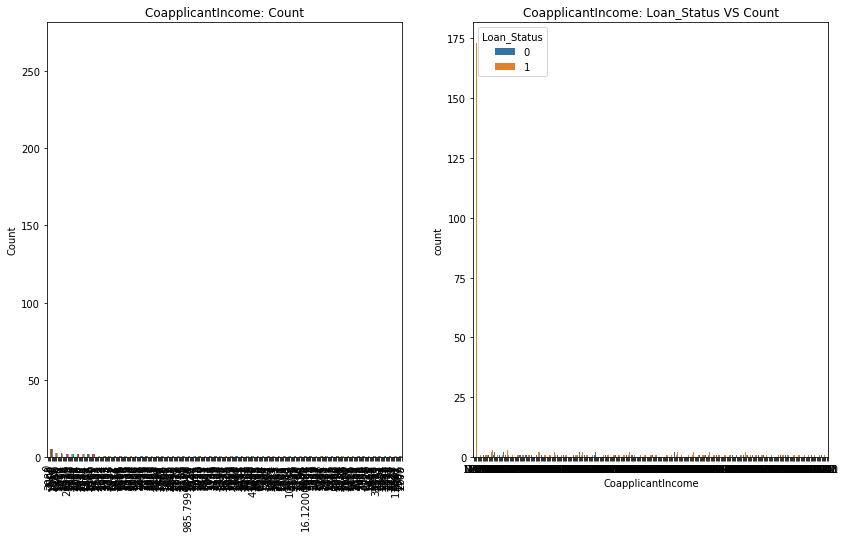

['Null' '1508' '0' '2358' '4196' '1516' '2504' '1526' '10968' '700' '1840'
 '8106' '2840' '1086' '3500' '5625' '1911' '1917' '2925' '2253' '1040'
 '2083' '3369' '1667' '3000' '2067' '1330' '1459' '7210' '1668' '1213'
 '2336' '3440' '2275' '1644' '1167' '1591' '2200' '2250' '2859' '3796'
 '3449' '4595' '2254' '3066' '1875' '1774' '4750' '3022' '4000' '2166'
 '1881' '2531' '2000' '2118' '4167' '2900' '5654' '1820' '2302' '997'
 '3541' '3263' '3806' '3583' '754' '1030' '1126' '3600' '2333' '4114'
 '2283' '1398' '2142' '2667' '8980' '2014' '1640' '3850' '2569' '1929'
 '7750' '1430' '2034' '4486' '1425' '1666' '830' '3750' '1041' '1280'
 '1447' '3166' '3333' '1769' '736' '1964' '1619' '11300' '1451' '7250'
 '5063' '2138' '5296' '2583' '2365' '2816' '2500' '1083' '1250' '3021'
 '983' '1800' '1775' '2383' '1717' '2791' '1010' '1695' '2054' '2598'
 '1779' '1260' '5000' '1983' '5701' '1300' '4417' '4333' '1843' '1868'
 '3890' '2167' '7101' '2100' '4250' '2209' '3447' '1387' '1811' '1560'
 '1857

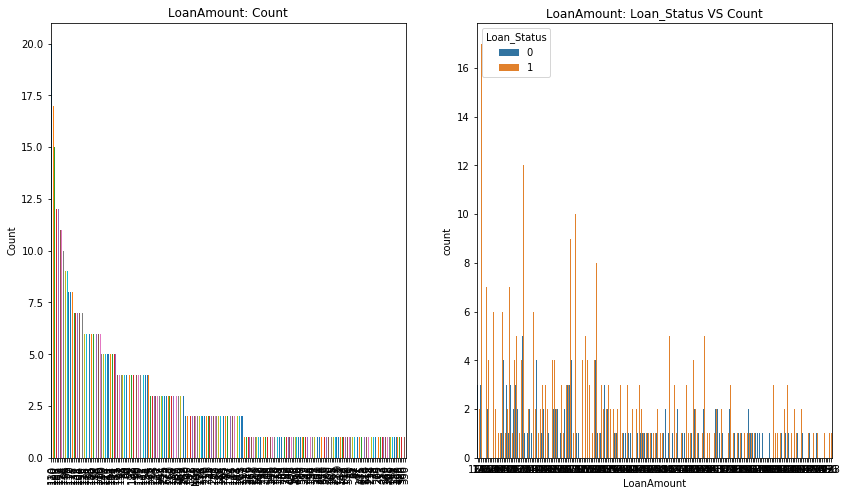

[nan '128' '66' '120' '141' '267' '95' '158' '168' '349' '70' '109' '200'
 '114' '17' '125' '100' '76' '133' '115' '104' '315' '116' '112' '151'
 '191' '122' '110' '35' '201' '74' '106' '320' '144' '184' '80' '47' '75'
 '134' '96' '88' '44' '286' '97' '135' '180' '99' '165' '258' '126' '312'
 '136' '172' '81' '187' '113' '176' '130' '111' '167' '265' '50' '210'
 '175' '131' '188' '25' 'Null' '137' '160' '225' '216' '94' '139' '152'
 '118' '185' '154' '85' '259' '194' '93' '370' '182' '650' '102' '290'
 '84' '242' '129' '30' '244' '600' '255' '98' '275' '121' '63' '700' '87'
 '101' '495' '67' '73' '260' '108' '58' '48' '164' '170' '83' '90' '166'
 '124' '55' '59' '127' '214' '240' '72' '60' '138' '42' '280' '140' '155'
 '123' '279' '192' '304' '330' '150' '207' '436' '78' '54' '89' '143'
 '105' '132' '480' '56' '159' '300' '376' '117' '71' '490' '173' '46'
 '228' '308' '236' '570' '380' '296' '156' '103' '45' '65' '53' '360' '62'
 '218' '178' '239' '405' '148' '190' '149' '153' '162' '2

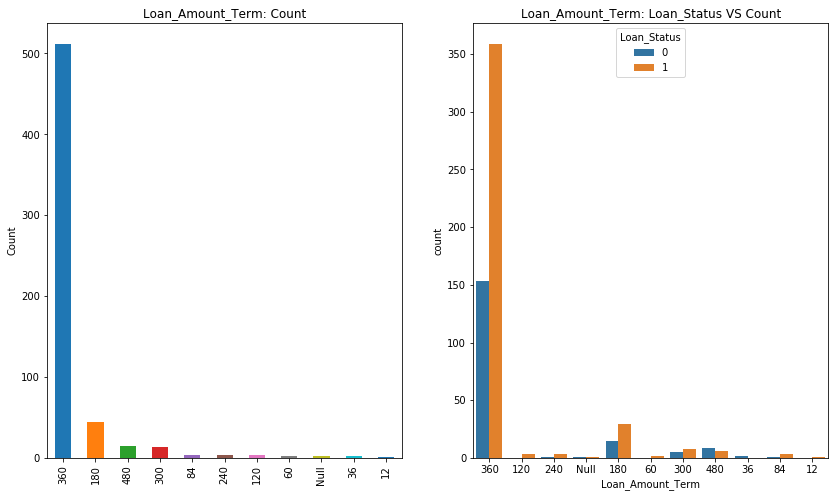

['360' '120' '240' 'Null' nan '180' '60' '300' '480' '36' '84' '12']
12 None
                  Loan_Status
Loan_Amount_Term             
12                   1.000000
120                  1.000000
180                  0.659091
240                  0.750000
300                  0.615385
36                   0.000000
360                  0.701172
480                  0.400000
60                   1.000000
84                   0.750000
Null                 0.500000
******************************Property_Area******************************


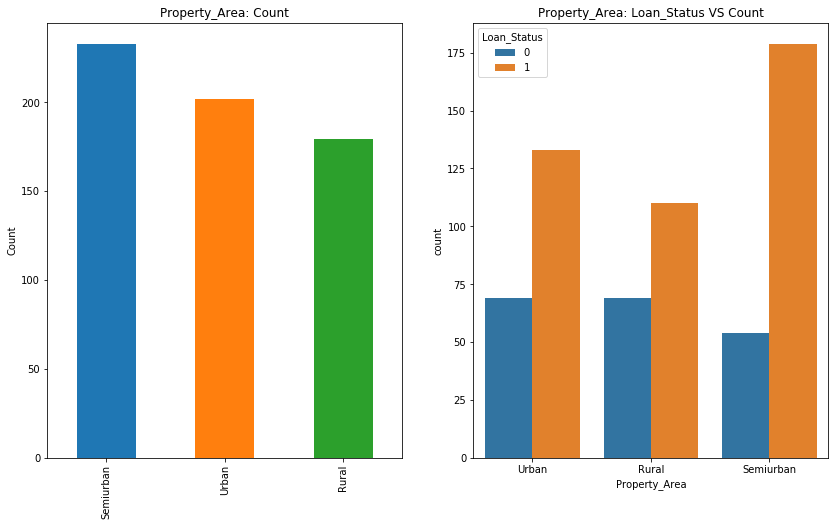

['Urban' 'Rural' 'Semiurban']
0 None
               Loan_Status
Property_Area             
Rural             0.614525
Semiurban         0.768240
Urban             0.658416


In [53]:
for col in cat_cols:
    print('*'*30 +col +'*'*30 )
    make_plot(df, col)

In [273]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score

## 연속형 변수

In [106]:
df[df['LoanAmount']=='Null']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
95,LP001326,Male,No,0,Graduate,NaN,6782,0,Null,360,NaN,Urban,0
103,LP001356,Male,Yes,0,Graduate,No,4652,3583,Null,360,1.0,Semiurban,1


In [107]:
df[df['LoanAmount'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,Null,NaN,360,1.0,Urban,1
35,LP001106,Male,Yes,0,Graduate,No,2275,2067,NaN,360,1.0,Urban,1
63,LP001213,Male,Yes,1,Graduate,No,4945,0,NaN,360,0.0,Rural,0
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0,NaN,360,1.0,Semiurban,1
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0,NaN,360,1.0,Urban,1
113,LP001392,Female,No,1,Graduate,Yes,7451,Null,NaN,360,1.0,Semiurban,1
127,LP001449,Male,No,0,Graduate,No,3865,1640,NaN,360,1.0,Rural,1
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0,NaN,180,1.0,Urban,0
284,LP001922,Male,Yes,0,Graduate,No,20667,0,NaN,360,1.0,Rural,0
305,LP001990,Male,No,0,Not Graduate,No,2000,0,NaN,360,1.0,Urban,0


In [108]:
df.loc[df['LoanAmount']=='Null','LoanAmount'] = None

In [109]:
df[df['CoapplicantIncome']=='Null']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,Null,NaN,360,1.0,Urban,1
16,LP001034,Male,No,1,Not Graduate,No,3596,Null,100,240,NaN,Urban,1
17,LP001036,Female,No,0,Graduate,No,3510,Null,76,360,0.0,Urban,0
68,LP001238,Male,Yes,3+,Not Graduate,Yes,7100,Null,125,60,1.0,Urban,1
113,LP001392,Female,No,1,Graduate,Yes,7451,Null,NaN,360,1.0,Semiurban,1


In [110]:
df['CoapplicantIncome'].unique()

array(['Null', '1508', '0', '2358', '4196', '1516', '2504', '1526',
       '10968', '700', '1840', '8106', '2840', '1086', '3500', '5625',
       '1911', '1917', '2925', '2253', '1040', '2083', '3369', '1667',
       '3000', '2067', '1330', '1459', '7210', '1668', '1213', '2336',
       '3440', '2275', '1644', '1167', '1591', '2200', '2250', '2859',
       '3796', '3449', '4595', '2254', '3066', '1875', '1774', '4750',
       '3022', '4000', '2166', '1881', '2531', '2000', '2118', '4167',
       '2900', '5654', '1820', '2302', '997', '3541', '3263', '3806',
       '3583', '754', '1030', '1126', '3600', '2333', '4114', '2283',
       '1398', '2142', '2667', '8980', '2014', '1640', '3850', '2569',
       '1929', '7750', '1430', '2034', '4486', '1425', '1666', '830',
       '3750', '1041', '1280', '1447', '3166', '3333', '1769', '736',
       '1964', '1619', '11300', '1451', '7250', '5063', '2138', '5296',
       '2583', '2365', '2816', '2500', '1083', '1250', '3021', '983',
       '1800'

In [111]:
df[df['CoapplicantIncome']=='Null'] #추후 추정해야함

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,Null,NaN,360,1.0,Urban,1
16,LP001034,Male,No,1,Not Graduate,No,3596,Null,100,240,NaN,Urban,1
17,LP001036,Female,No,0,Graduate,No,3510,Null,76,360,0.0,Urban,0
68,LP001238,Male,Yes,3+,Not Graduate,Yes,7100,Null,125,60,1.0,Urban,1
113,LP001392,Female,No,1,Graduate,Yes,7451,Null,NaN,360,1.0,Semiurban,1


In [112]:
df.loc[df['CoapplicantIncome']=='Null','CoapplicantIncome'] = None

In [114]:
# LoanAmount CoapplicantIncome 변환
df['LoanAmount'] = df['LoanAmount'].astype(float)
df['CoapplicantIncome'] = df['CoapplicantIncome'].astype(float)

In [115]:
num_cols = [col for col in df.columns if df[col].dtypes in ['float64','int64']]

In [116]:
num_cols = num_cols[:-1]

### 일단 플랏 찍기 위해서 Na값 전부 0.01로 치환하자

In [117]:
df[num_cols].isnull().sum()

ApplicantIncome       0
CoapplicantIncome     5
LoanAmount           22
Credit_History       50
dtype: int64

In [123]:
# CoapplicantIncome , LoanAmount
df.loc[df['CoapplicantIncome'].isnull(),'CoapplicantIncome'] = 0.01
df.loc[df['LoanAmount'].isnull(),'LoanAmount'] = 0.01

ApplicantIncome


/home/vips/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/vips/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


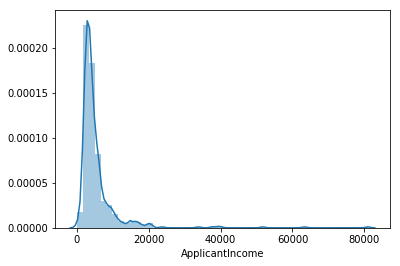

CoapplicantIncome


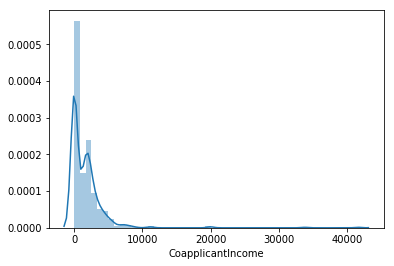

LoanAmount


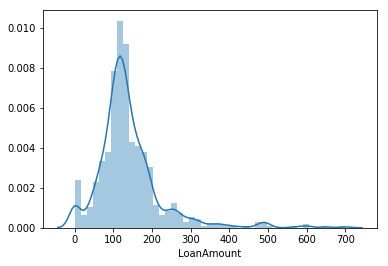

Credit_History


/home/vips/.local/lib/python3.5/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/vips/.local/lib/python3.5/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/vips/.local/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/vips/.local/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


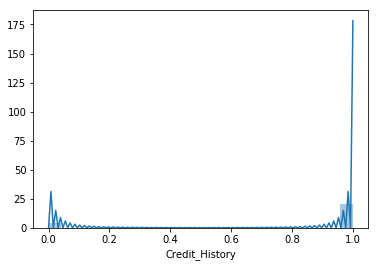

In [124]:
for col in num_cols:
    print(col)
    sns.distplot(df[col])
    plt.show()

In [131]:
df['Credit_History'].unique() # Credit_history 이거 범주형임

array(['1', '0', nan], dtype=object)

In [130]:
df.loc[df['Credit_History']==1.0,'Credit_History'] = '1'
df.loc[df['Credit_History']==0.0,'Credit_History'] = '0'

In [133]:
df['Credit_History'] = df['Credit_History'].astype('object')

In [142]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [143]:
df['ApplicantIncome'].mode()

0    2500
dtype: int64

In [145]:
sum(df['CoapplicantIncome']==0)

268

- ApplicantIncome 2500부근에 몰려있음
- CoapplicantIncome 0이 압도적으로 많음 268개

In [147]:
num_cols=num_cols[:-1]
num_cols

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [150]:
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Status']].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.538293,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.190378,-0.059187
LoanAmount,0.538293,0.190378,1.000000,-0.010633
Loan_Status,-0.004710,-0.059187,-0.010633,1.000000


단일 연속형 변수는 대출승인에 영향을 주지 않음, BUt LoanAmount	-ㅁpplicantIncome	상관관계가 높음

# 결측값처리

In [157]:
cat_cols.append('Credit_History')

In [161]:
cat_cols.append('Loan_Status')

In [162]:
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Property_Area',
 'Credit_History',
 'Loan_Status']

In [163]:
df[cat_cols].isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
Loan_Amount_Term    12
Property_Area        0
Credit_History      50
Loan_Status          0
dtype: int64

### Gender

In [160]:
df[df['Gender'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360,0,Rural,0
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360,1,Rural,1
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300,1,Urban,1
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360,1,Rural,1
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360,1,Rural,0
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180,1,Urban,1
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360,NaN,Semiurban,1
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360,1,Semiurban,1
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360,0,Semiurban,0
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360,1,Urban,0


In [165]:
df_c = df.copy()
df_c = df_c[df_c['Gender'].notnull()]
d = {'Male':1, 'Female':0}
df_c.Gender = df_c.Gender.map(d)


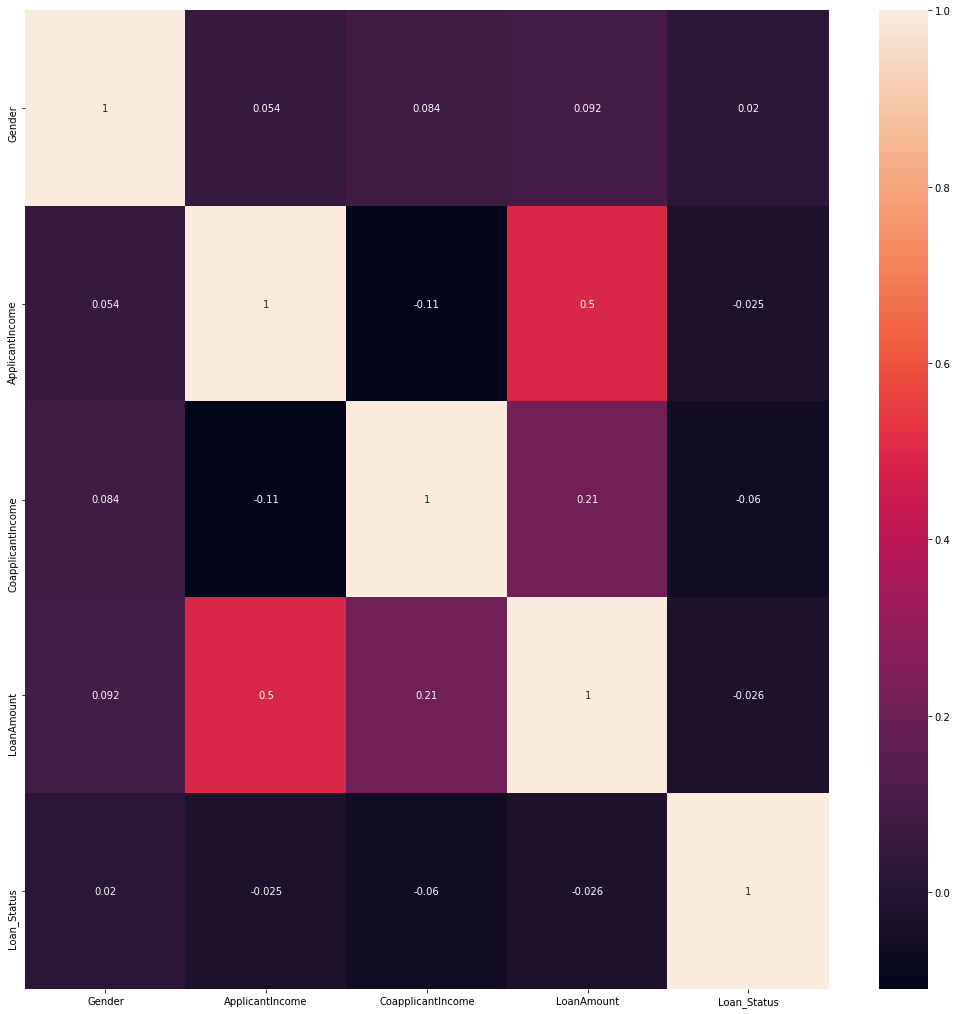

In [172]:
fig, ax = plt.subplots(figsize = (18,18))
sns.heatmap(df_c.corr(),annot = True)

- 단순히 성별과 다른 어떤 속성사이에 거의 관계가 없다는 것을 알 수 있다.
- 결측값을 최빈값으로 대체하자

In [174]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
d = {'Male':1, 'Female':0}
df.Gender = df.Gender.map(d)

### married

In [173]:
df[df['Married'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.00,360,1,Urban,1
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.00,480,1,Semiurban,1
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,0.01,240,1,Semiurban,1


- Dependents 로 추정하려했지만 뭐 3개밖에 없으니 최빈값대체하자

In [175]:
df.Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [176]:
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
d = {'Yes':1, 'No':0}
df.Married = df.Married.map(d)

### Dependents

In [177]:
df[df['Dependents'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,1,1,NaN,Graduate,No,13650,0.0,0.01,360,1,Urban,1
104,LP001357,1,1,NaN,Graduate,No,3816,754.0,160.00,360,1,Urban,1
120,LP001426,1,1,NaN,Graduate,No,5667,2667.0,180.00,360,1,Rural,1
226,LP001754,1,1,NaN,Not Graduate,Yes,4735,0.0,138.00,360,1,Urban,0
228,LP001760,1,1,NaN,Graduate,No,4758,0.0,158.00,480,1,Semiurban,1
293,LP001945,0,0,NaN,Graduate,No,5417,0.0,143.00,480,0,Urban,0
301,LP001972,1,1,NaN,Not Graduate,No,2875,1750.0,105.00,360,1,Semiurban,1
332,LP002100,1,0,NaN,Graduate,No,2833,0.0,71.00,360,1,Urban,1
335,LP002106,1,1,NaN,Graduate,Yes,5503,4490.0,70.00,NaN,1,Semiurban,1
346,LP002130,1,1,NaN,Not Graduate,No,3523,3230.0,152.00,360,0,Rural,0


In [178]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [182]:
df[df['Dependents']=='0']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,Graduate,No,5849,0.01,0.01,360,1,Urban,1
2,LP001005,1,1,0,Graduate,Yes,3000,0.00,66.00,360,1,Urban,1
3,LP001006,1,1,0,Not Graduate,No,2583,2358.00,120.00,360,1,Urban,1
4,LP001008,1,0,0,Graduate,No,6000,0.00,141.00,360,1,Urban,1
6,LP001013,1,1,0,Not Graduate,No,2333,1516.00,95.00,360,1,Urban,1
13,LP001029,1,0,0,Graduate,No,1853,2840.00,114.00,360,1,Rural,0
15,LP001032,1,0,0,Graduate,No,4950,0.00,125.00,360,1,Urban,1
17,LP001036,0,0,0,Graduate,No,3510,0.01,76.00,360,0,Urban,0
18,LP001038,1,1,0,Not Graduate,No,4887,0.00,133.00,360,1,Rural,0
19,LP001041,1,1,0,Graduate,NaN,2600,3500.00,115.00,Null,1,Urban,1


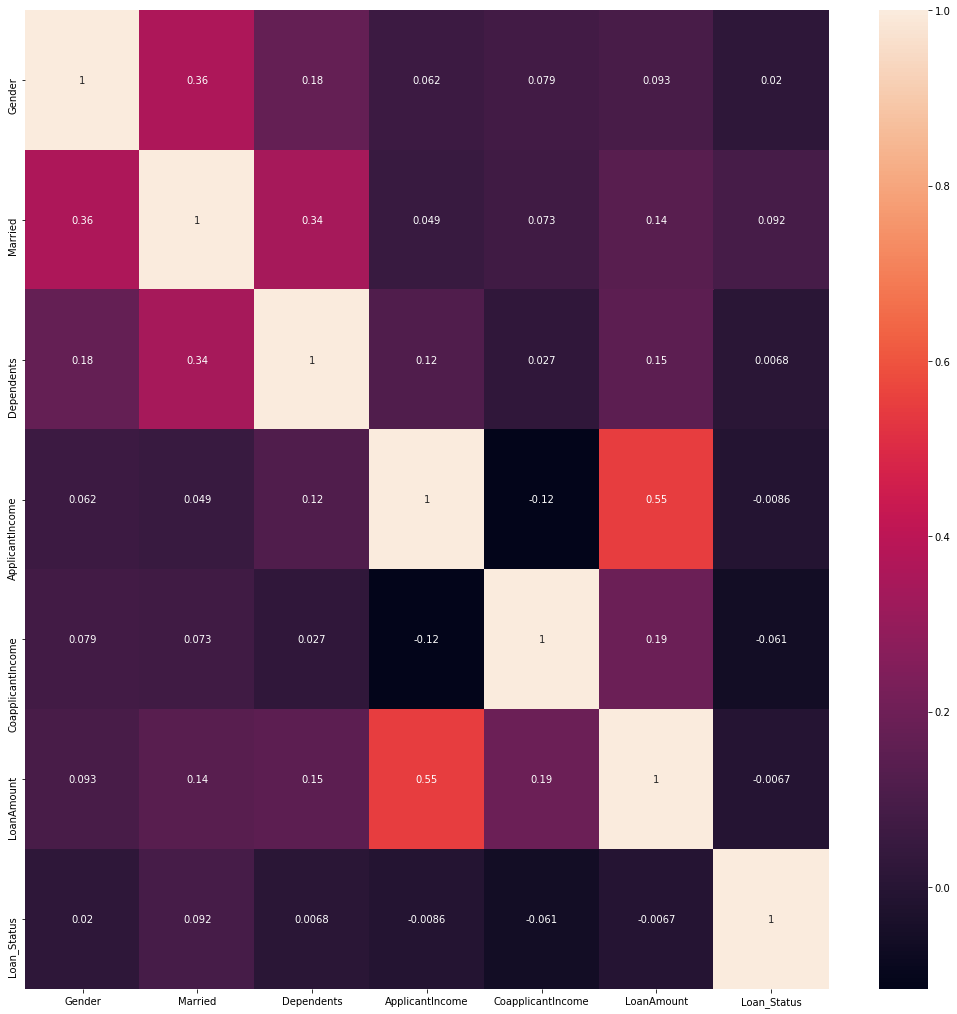

In [180]:
df_c = df.copy()
df_c = df_c[df_c['Dependents'].notnull()]
d = {'0':0, '1':1,'2':2,'3+':3}
df_c.Dependents = df_c.Dependents.map(d)
fig, ax = plt.subplots(figsize = (18,18))
sns.heatmap(df_c.corr(),annot = True)

- Dependnet 랑 married로 추정하려했지만 결혼했더라도 dependents 가 0인 집단이 많다. 
- -> 최빈값으로 처리하자 15개밖에안되고..

In [183]:
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)
d = {'0':0, '1':1,'2':2,'3+':3}
df.Dependents = df.Dependents.map(d)

In [ ]:
Self_Employed       32
Loan_Amount_Term    12
Property_Area        0
Credit_History      50

In [184]:
df[df['Self_Employed'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,1,1,2,Graduate,NaN,2500,1840.0,109.00,360,1,Urban,1
19,LP001041,1,1,0,Graduate,NaN,2600,3500.0,115.00,Null,1,Urban,1
24,LP001052,1,1,1,Graduate,NaN,3717,2925.0,151.00,360,NaN,Semiurban,0
29,LP001087,0,0,2,Graduate,NaN,3750,2083.0,120.00,360,1,Semiurban,1
30,LP001091,1,1,1,Graduate,NaN,4166,3369.0,201.00,360,NaN,Urban,0
95,LP001326,1,0,0,Graduate,NaN,6782,0.0,0.01,360,NaN,Urban,0
107,LP001370,1,0,0,Not Graduate,NaN,7333,0.0,120.00,360,1,Rural,0
111,LP001387,0,1,0,Graduate,NaN,2929,2333.0,139.00,360,1,Semiurban,1
114,LP001398,1,0,0,Graduate,NaN,5050,0.0,118.00,360,1,Semiurban,1
158,LP001546,1,0,0,Graduate,NaN,2980,2083.0,120.00,360,1,Rural,1


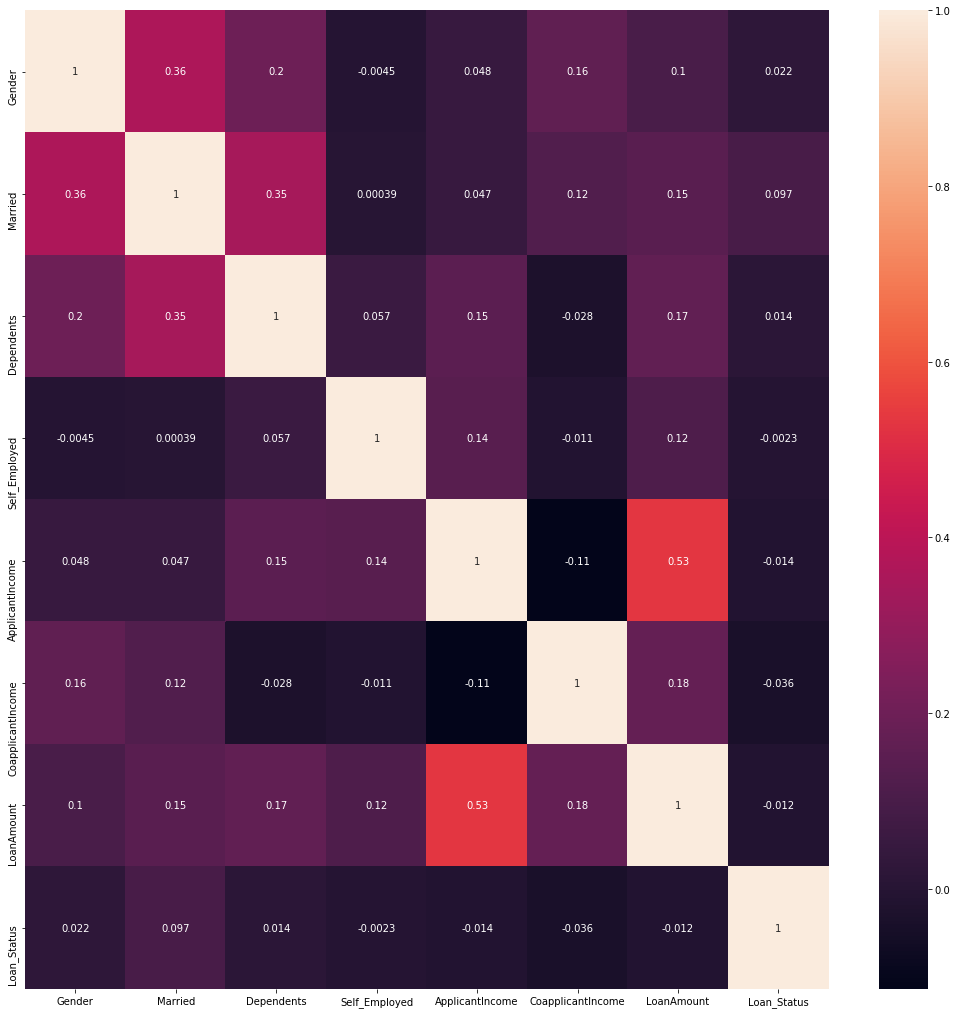

In [187]:
df_c = df.copy()
df_c = df_c[df_c['Self_Employed'].notnull()]
d = {'No':0, 'Yes':1}
df_c.Self_Employed = df_c.Self_Employed.map(d)
fig, ax = plt.subplots(figsize = (18,18))
sns.heatmap(df_c.corr(),annot = True)

In [188]:
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
d = {'No':0, 'Yes':1}
df.Self_Employed = df.Self_Employed.map(d)

In [189]:
df[df['Loan_Amount_Term'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
36,LP001109,1,1,0,Graduate,0,1828,1330.0,100.0,NaN,0,Urban,0
44,LP001136,1,1,0,Not Graduate,1,4695,0.0,96.0,NaN,1,Urban,1
45,LP001137,0,0,0,Graduate,0,3410,0.0,88.0,NaN,1,Urban,1
73,LP001250,1,1,3,Not Graduate,0,4755,0.0,95.0,NaN,0,Semiurban,0
165,LP001574,1,1,0,Graduate,0,3707,3166.0,182.0,NaN,1,Rural,1
197,LP001669,0,0,0,Not Graduate,0,1907,2365.0,120.0,NaN,1,Urban,1
223,LP001749,1,1,0,Graduate,0,7578,1010.0,175.0,NaN,1,Semiurban,1
232,LP001770,1,0,0,Not Graduate,0,3189,2598.0,120.0,NaN,1,Rural,1
335,LP002106,1,1,0,Graduate,1,5503,4490.0,70.0,NaN,1,Semiurban,1
367,LP002188,1,0,0,Graduate,0,5124,0.0,124.0,NaN,0,Rural,0


In [195]:
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mode()[0])

?????????????????????

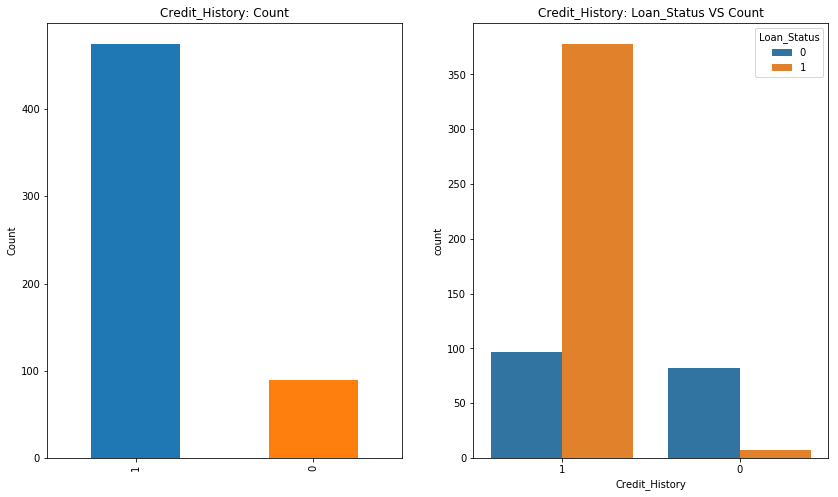

['1' '0' nan]
50 None
                Loan_Status
Credit_History             
0                  0.078652
1                  0.795789


In [192]:
make_plot(df, 'Credit_History')

In [193]:
df.Credit_History = df.Credit_History.fillna(df.Credit_History.mode()[0])

In [215]:
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)
d = {'0':0, '1':1}
df.Credit_History = df.Credit_History.map(d)

## 수치형 변수들 0.01 (missing)

In [200]:
# CoapplicantIncome , LoanAmount
df.loc[df['CoapplicantIncome']==0.01,'CoapplicantIncome'] = df['CoapplicantIncome'].mean()
df.loc[df['LoanAmount']==0.01,'LoanAmount'] = df['LoanAmount'].mean()

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
Loan_ID              614 non-null object
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null int64
Education            0 non-null float64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null int64
Credit_History       614 non-null int64
Loan_Status          614 non-null int64
Rural                614 non-null uint8
Semiurban            614 non-null uint8
Urban                614 non-null uint8
dtypes: float64(3), int64(8), object(1), uint8(3)
memory usage: 59.4+ KB


In [203]:
df["Education"].fillna(df["Education"].mode()[0],inplace=True)
d = {'No':0, 'Yes':1}
df.Education = df.Education.map(d)

In [ ]:
df["Education"].fillna(df["Education"].mode()[0],inplace=True)
d = {'No':0, 'Yes':1}
df.Education = df.Education.map(d)

In [211]:
tt = pd.get_dummies(df['Property_Area'])

In [212]:
df = pd.concat([df,tt],axis=1)
df = df.drop('Property_Area',1)

In [218]:
df.loc[df['Loan_Amount_Term']=='Null','Loan_Amount_Term'] = df['Loan_Amount_Term'].mode()[0]

In [222]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(int)

## split

In [224]:
df = df.drop('Education',1)
df = df.drop('Loan_ID',1)

In [225]:
from sklearn.cross_validation import train_test_split

/home/vips/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [227]:
X= df.drop(['Loan_Status'],axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## base line model

In [228]:
from sklearn.linear_model import LogisticRegression

In [230]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
prediction= logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.83      0.45      0.59        33
          1       0.83      0.97      0.89        90

avg / total       0.83      0.83      0.81       123



In [274]:
metrics.accuracy_score(y_test,prediction)

0.8292682926829268

In [234]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
n_estimators = [90,95,100,105,110]
max_depth = range(1,30)
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)


parameters = {'n_estimators':n_estimators, 
         'max_depth':max_depth, 
        }
grid = GridSearchCV(RandomForestClassifier(),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X,y) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 30), 'n_estimators': [90, 95, 100, 105, 110]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [235]:
prediction= grid.predict(X_test)
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.88      0.42      0.57        33
          1       0.82      0.98      0.89        90

avg / total       0.84      0.83      0.81       123



In [237]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [238]:
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=3)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = neural_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

In [239]:
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
0,Logistic Reg.,0.798357
5,Rand FC,0.761709
4,Grad B CLF,0.745436
1,SVC,0.676168
3,Dec Tree,0.666081
2,KNN,0.627263
6,Neural Classifier,0.509202
7,Naives Bayes,0.509202


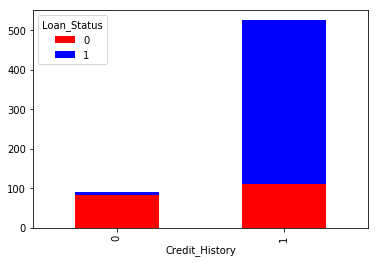

In [251]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

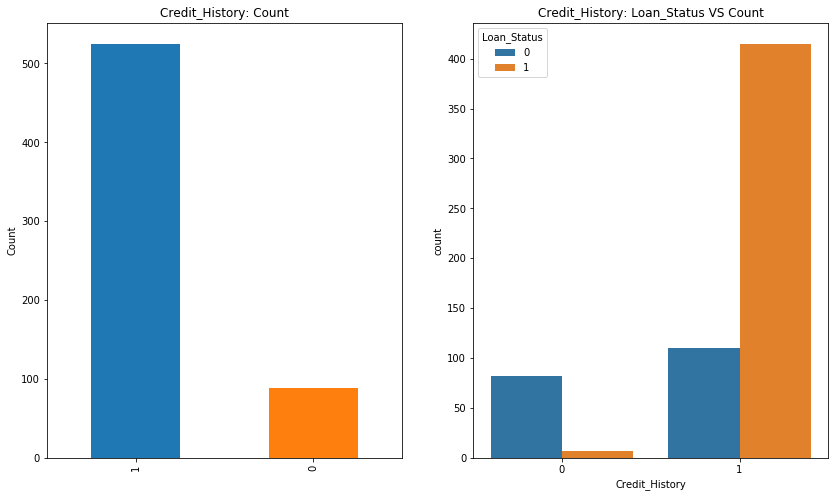

[1 0]
0 None
                Loan_Status
Credit_History             
0                  0.078652
1                  0.790476


In [254]:
make_plot(df,'Credit_History')

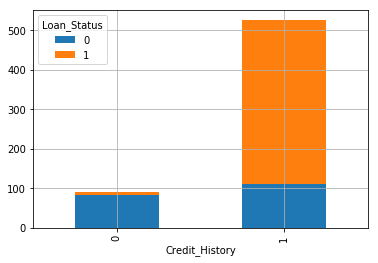

In [269]:
temp3 = pd.crosstab([df['Credit_History']], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, grid=True)


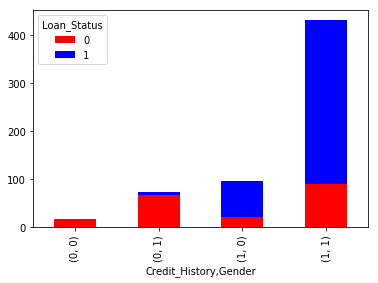

In [252]:
temp3 = pd.crosstab([df['Credit_History'],df['Gender']], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [272]:
pd.crosstab([df['Credit_History']], df['Loan_Status'])

Loan_Status,0,1
Credit_History,,
0,82,7
1,110,415


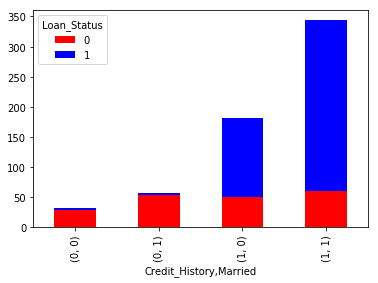

In [262]:
temp3 = pd.crosstab([df['Credit_History'],df['Married']], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [267]:
df['Credit_History'].value_counts()

1    525
0     89
Name: Credit_History, dtype: int64

In [258]:
temp3

Loan_Status               0    1  All
Credit_History Married               
0              0         29    3   32
               1         53    4   57
1              0         50  131  181
               1         60  284  344
All                     192  422  614